In [1]:
import os
import torch
import torch.nn as nn
from torch.autograd import Variable
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from os.path import join as oj
import sys
sys.path.append('..')
import numpy as np
from copy import deepcopy
import pickle as pkl
from torch.optim.lr_scheduler import StepLR
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise
from vision_analyze import viz_weights
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline
%load_ext autoreload
%autoreload 2

# cifar

In [ ]:
def plot_all_weights():
    for fname in tqdm(os.listdir('sparse_bases')):
        if '.npy' in fname and '60000' in fname:
            print(fname)
            bases = np.load(oj('sparse_bases', fname))
            viz_weights.plot_weights(bases)
            plt.savefig(oj('sparse_bases', fname[:-4] + '.png'), dpi=600, bbox_inches = 'tight', pad_inches = 0)
# plot_all_weights()

In [2]:
# fname = 'bases_iters=4400_alpha=0.1_ncomps=256.npy'
fname = 'bases_iters=300_alpha=1.0_ncomps=256.npy'
bases = np.load(oj('sparse_cifar', fname))
# viz_weights.plot_weights(bases, dset='rgb')

# for mnist


  0%|          | 0/10 [00:00<?, ?it/s]

bases_iters=60000_alpha=0.1.npy



 40%|████      | 4/10 [00:20<00:31,  5.23s/it]

bases_iters=60000_alpha=1.npy


 50%|█████     | 5/10 [00:43<00:51, 10.40s/it]

bases_iters=60000_alpha=100.npy


 60%|██████    | 6/10 [01:04<00:54, 13.59s/it]

bases_iters=60000_alpha=10.npy


100%|██████████| 10/10 [01:25<00:00,  8.53s/it]


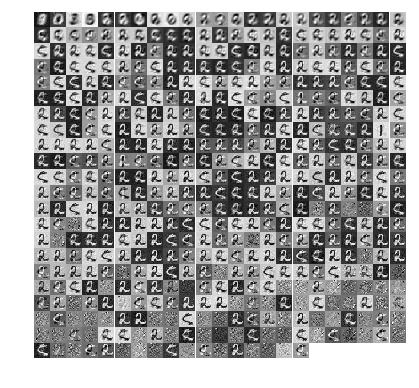

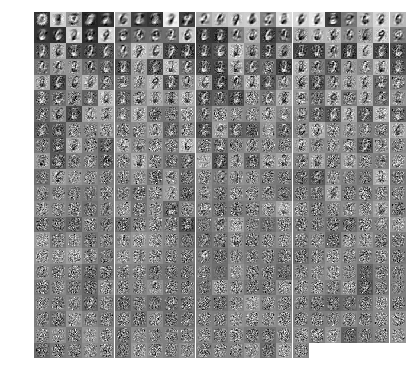

In [ ]:
from matplotlib.ticker import NullLocator
params_to_vary = {
    'alpha': [0.001, 0.05, 1, 10],
    'num_bases': [25, 100, 400],
    'class_num': [0, 1],
    'batch_size': [100]
}
def plot_all_weights():
    for fname in tqdm(os.listdir('bases/mnist_full')):
        if '.npy' in fname and '60000' in fname:
            print(fname)
            bases = np.load(oj('bases/mnist_full', fname))
            viz_weights.plot_weights(bases, dset='mnist')
            
            plt.gca().set_axis_off()
            plt.gca().xaxis.set_major_locator(NullLocator())
            plt.gca().yaxis.set_major_locator(NullLocator())
            plt.margins(0,0)
            plt.savefig(oj('bases/mnist_full', fname[:-4] + '.pdf'), bbox_inches = 'tight', pad_inches = 0)
plot_all_weights()